<a href="https://colab.research.google.com/github/devz-002/Abstract-Hacks/blob/master/SIKKIM_1(15_9_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install geopandas

In [ ]:
data_path = '/content/drive/MyDrive/ColabNotebooks/IMD-FINAL-YEAR-PROJECT/rainfall-Rfone-datasets/'

In [ ]:
rainfall_data_2022 = xr.open_dataset(data_path + '2022.nc')

In [ ]:
print(rainfall_data_2022.head())

<xarray.Dataset>
Dimensions:    (LONGITUDE: 5, LATITUDE: 5, TIME: 5)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 67.5 68.5 69.5 70.5
  * LATITUDE   (LATITUDE) float64 6.5 7.5 8.5 9.5 10.5
  * TIME       (TIME) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-01-05
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized) 19-Jan-23
    Conventions:  CF-1.6


In [ ]:
# Access the longitude and latitude coordinates from the dataset
longitude_values = rainfall_data_2022['LONGITUDE'].values
latitude_values = rainfall_data_2022['LATITUDE'].values

# Find the minimum and maximum values for longitude and latitude
min_longitude = longitude_values.min()
max_longitude = longitude_values.max()
min_latitude = latitude_values.min()
max_latitude = latitude_values.max()

# Print the range of longitude and latitude
print(f"Longitude Range: ({min_longitude}, {max_longitude})")
print(f"Latitude Range: ({min_latitude}, {max_latitude})")


Longitude Range: (66.5, 100.5)
Latitude Range: (6.5, 38.5)


In [ ]:
print(longitude_values)

[ 66.5  67.5  68.5  69.5  70.5  71.5  72.5  73.5  74.5  75.5  76.5  77.5
  78.5  79.5  80.5  81.5  82.5  83.5  84.5  85.5  86.5  87.5  88.5  89.5
  90.5  91.5  92.5  93.5  94.5  95.5  96.5  97.5  98.5  99.5 100.5]


In [ ]:
rainfall_data_2022['LONGITUDE']

<xarray.DataArray 'LONGITUDE' (LONGITUDE: 35)>
array([ 66.5,  67.5,  68.5,  69.5,  70.5,  71.5,  72.5,  73.5,  74.5,  75.5,
        76.5,  77.5,  78.5,  79.5,  80.5,  81.5,  82.5,  83.5,  84.5,  85.5,
        86.5,  87.5,  88.5,  89.5,  90.5,  91.5,  92.5,  93.5,  94.5,  95.5,
        96.5,  97.5,  98.5,  99.5, 100.5])
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 67.5 68.5 69.5 ... 97.5 98.5 99.5 100.5
Attributes:
    units:          degrees_east
    point_spacing:  even
    axis:           X
    modulo:         360.0
    standard_name:  longitude

In [ ]:
print(latitude_values)

[ 6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5
 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5 28.5 29.5 30.5 31.5 32.5 33.5
 34.5 35.5 36.5 37.5 38.5]


In [ ]:
import geopandas as gpd

India_shapefile_path = '/content/drive/MyDrive/ColabNotebooks/IMD-FINAL-YEAR-PROJECT/india_district/india_district.shp'
India_shapefile = gpd.read_file(India_shapefile_path)


In [ ]:
print(India_shapefile.head())

   censuscode   district  dt_cen_cd  st_cen_cd           st_nm  \
0       536.0  Hyderabad          5         28  Andhra Pradesh   
1       494.0        Diu          1         25     Daman & Diu   
2        91.0      North          2          7    NCT of Delhi   
3       191.0   AZAMGARH         61          9   Uttar Pradesh   
4         NaN      HAPUR         73          9   Uttar Pradesh   

                                            geometry  
0  POLYGON ((78.51164 17.45434, 78.54018 17.46267...  
1                                               None  
2  POLYGON ((77.21434 28.78352, 77.24602 28.73389...  
3  POLYGON ((83.13416 26.38512, 83.23038 26.39447...  
4  POLYGON ((77.69096 28.74437, 77.75515 28.75001...  


In [ ]:
India_shapefile['geometry']

0      POLYGON ((78.51164 17.45434, 78.54018 17.46267...
1                                                   None
2      POLYGON ((77.21434 28.78352, 77.24602 28.73389...
3      POLYGON ((83.13416 26.38512, 83.23038 26.39447...
4      POLYGON ((77.69096 28.74437, 77.75515 28.75001...
                             ...                        
640    POLYGON ((77.75821 27.24778, 77.84657 27.29095...
641    POLYGON ((79.02026 25.93947, 79.03969 25.86874...
642    POLYGON ((78.55698 25.21186, 78.56941 25.22067...
643    POLYGON ((81.55147 25.28984, 81.52891 25.23349...
644    POLYGON ((82.26996 25.18233, 82.23566 25.21553...
Name: geometry, Length: 645, dtype: geometry

In [ ]:
sikkim_shapefile = India_shapefile[India_shapefile['st_nm'] == 'Sikkim']

In [ ]:
sikkim_shapefile

,censuscode,district,dt_cen_cd,st_cen_cd,st_nm,geometry
41,243.0,South,3,11,Sikkim,"POLYGON ((88.48857 27.37808, 88.44952 27.26094..."
184,242.0,West,2,11,Sikkim,"POLYGON ((88.28422 27.51260, 88.27737 27.41158..."
361,244.0,East,4,11,Sikkim,"POLYGON ((88.81334 27.41401, 88.86380 27.38657..."
578,241.0,North,1,11,Sikkim,"POLYGON ((88.81334 27.41401, 88.72133 27.41643..."


In [ ]:
import geopandas as gpd

# Load the shapefile


# Loop through each district and extract latitude and longitude bounds
for index, row in sikkim_shapefile.iterrows():
    district_name = row['district']

    # Get the bounds (min_lon, min_lat, max_lon, max_lat) of the district's geometry
    min_lon, min_lat, max_lon, max_lat = row['geometry'].bounds

    # Print or use these values for further analysis
    print(f"District: {district_name}, Longitude Range: ({min_lon}, {max_lon}), Latitude Range: ({min_lat}, {max_lat})")

District: South, Longitude Range: (88.277369, 88.539235), Latitude Range: (27.081327, 27.521003)
District: West, Longitude Range: (88.016857, 88.360853), Latitude Range: (27.111336, 27.617841)
District: East, Longitude Range: (88.449516, 88.906269), Latitude Range: (27.143752, 27.41643)
District: North, Longitude Range: (88.117231, 88.888228), Latitude Range: (27.378076, 28.104082)


In [ ]:
for index, row in sikkim_shapefile.iterrows():
    district_name = row['district']
    print(district_name)
    print(row['geometry'])


South
POLYGON ((88.488572 27.378076, 88.449516 27.260943, 88.497108 27.230238, 88.527998 27.177901, 88.539235 27.154065, 88.439122 27.081327, 88.28551 27.130496, 88.310252 27.2258, 88.302945 27.333857, 88.360853 27.378007, 88.350575 27.413878, 88.277369 27.411584, 88.284224 27.512595, 88.358319 27.521003, 88.408173 27.475389, 88.422114 27.418316, 88.488572 27.378076))
West
POLYGON ((88.284224 27.512595, 88.277369 27.411584, 88.350575 27.413878, 88.360853 27.378007, 88.302945 27.333857, 88.310252 27.2258, 88.28551 27.130496, 88.186456 27.134338, 88.159769 27.111336, 88.096179 27.138352, 88.065874 27.213452, 88.016857 27.216439, 88.062326 27.329064, 88.045515 27.367351, 88.070797 27.425673, 88.04736 27.493289, 88.117231 27.617841, 88.212296 27.581049, 88.284224 27.512595))
East
POLYGON ((88.813341 27.414007, 88.863797 27.38657, 88.897036 27.336205, 88.906269 27.274756, 88.80821 27.247377, 88.79172 27.18178, 88.758699 27.148003, 88.72484 27.143752, 88.598686 27.1942, 88.527998 27.177901, 

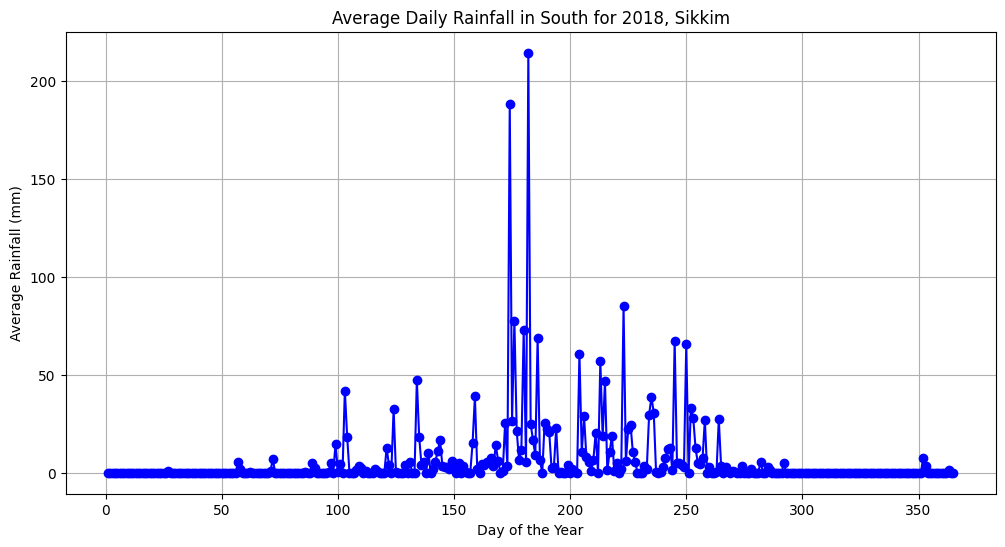

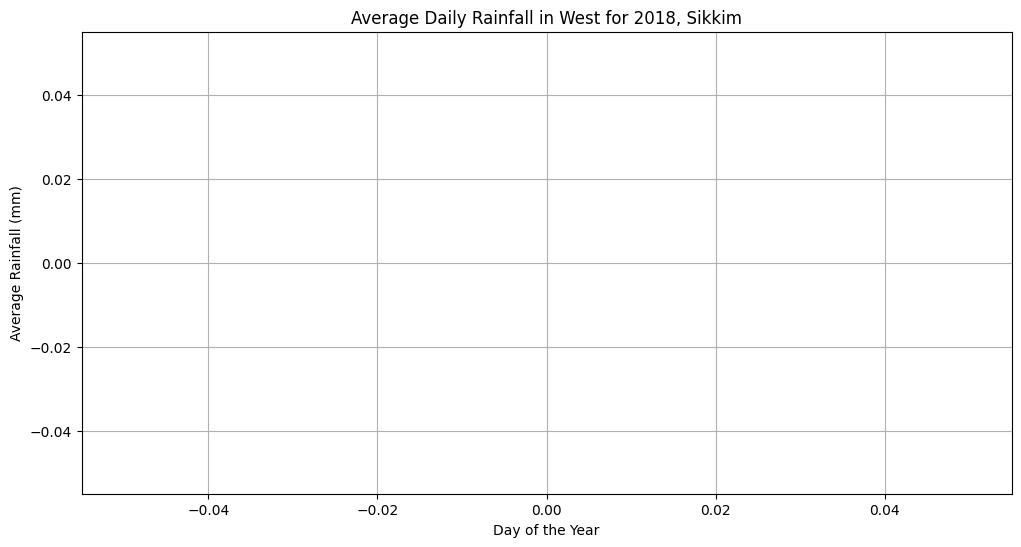

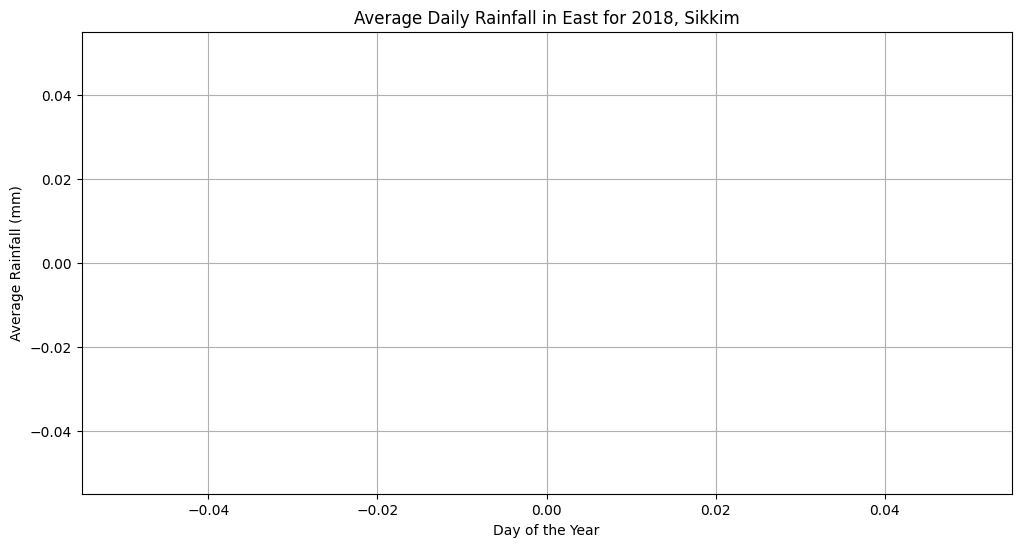

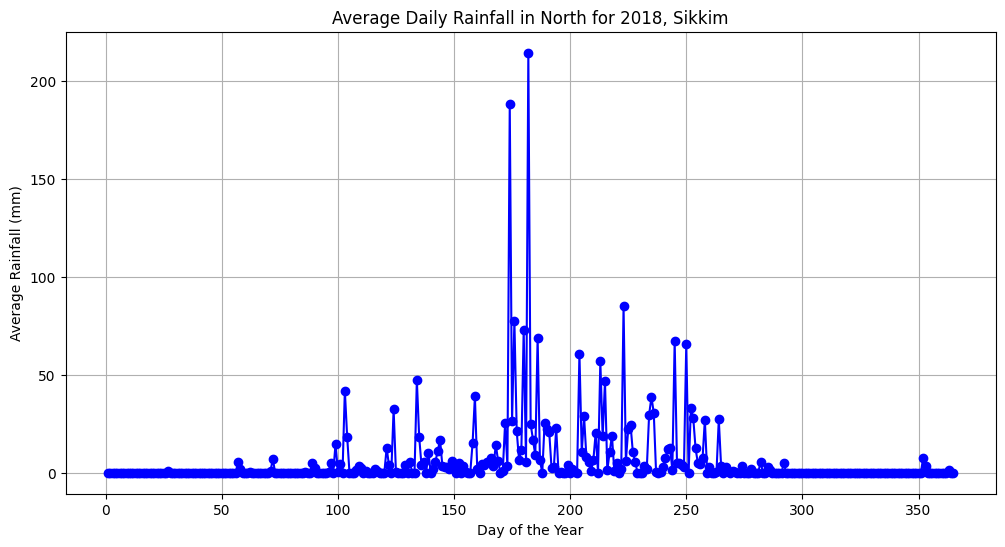

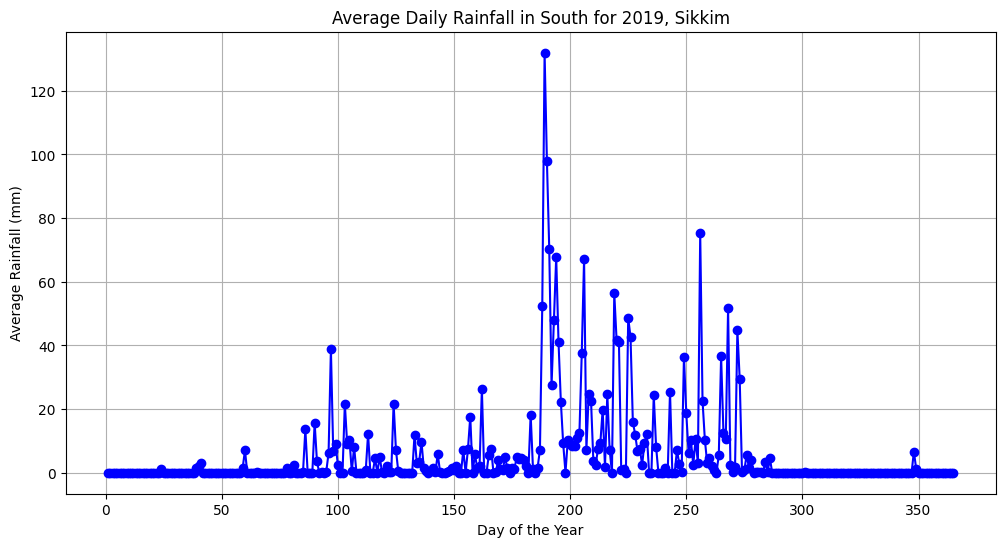

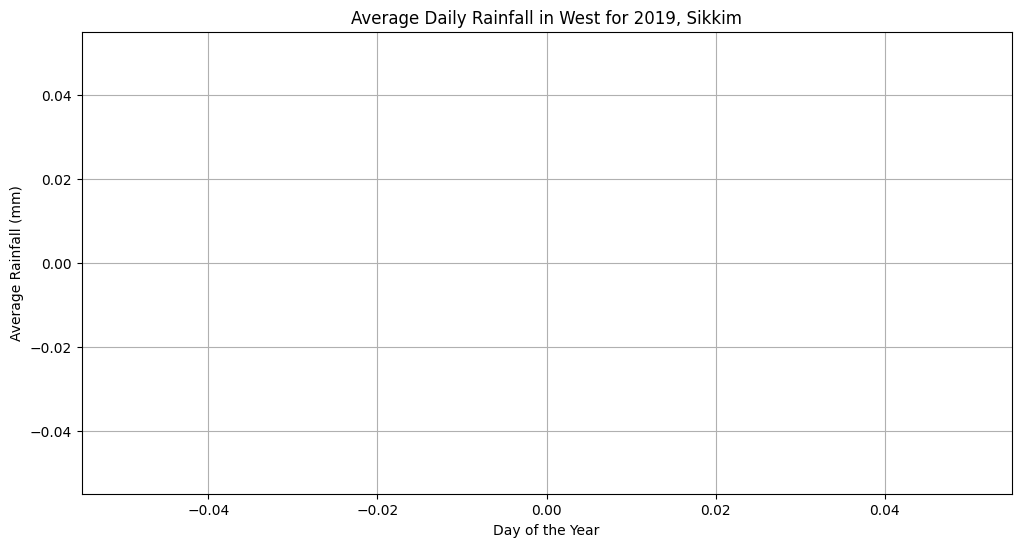

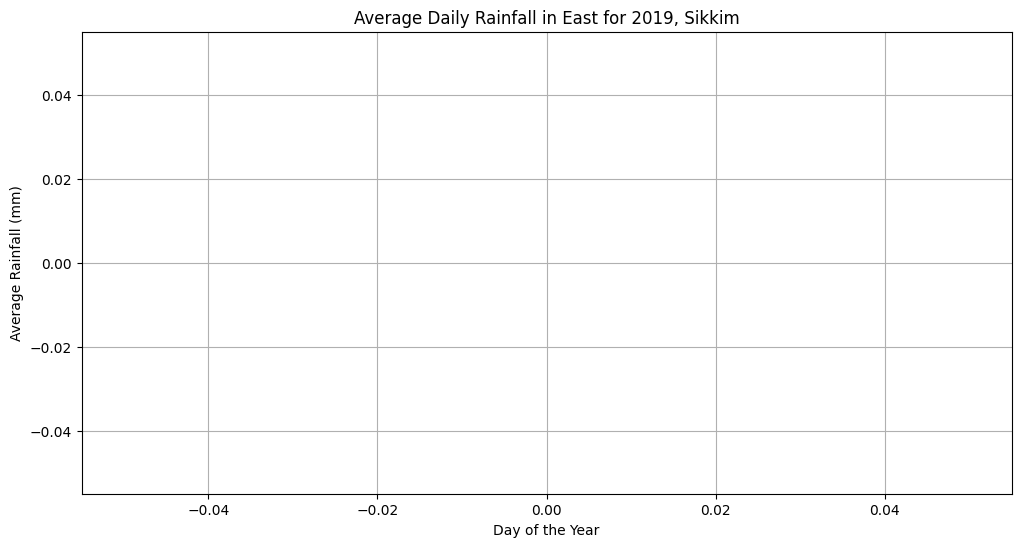

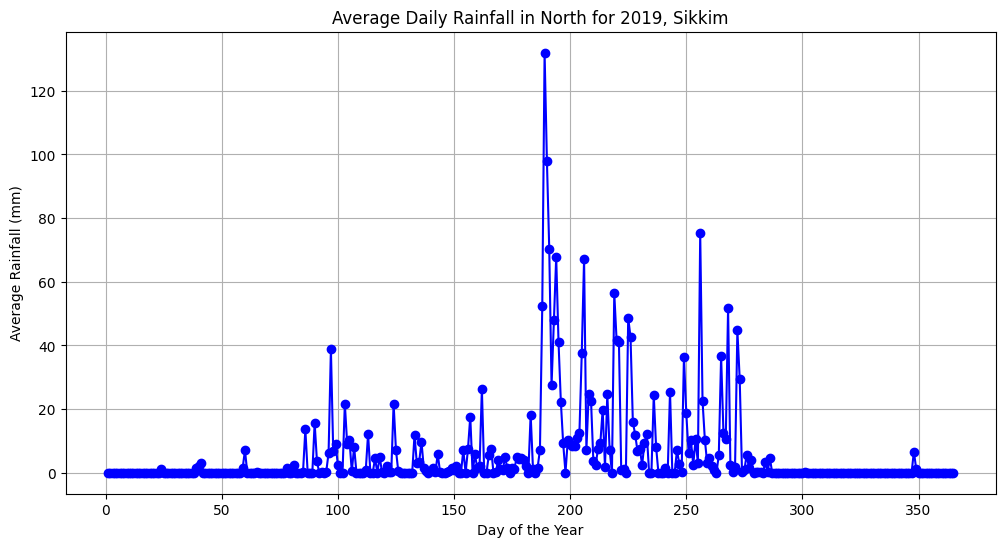

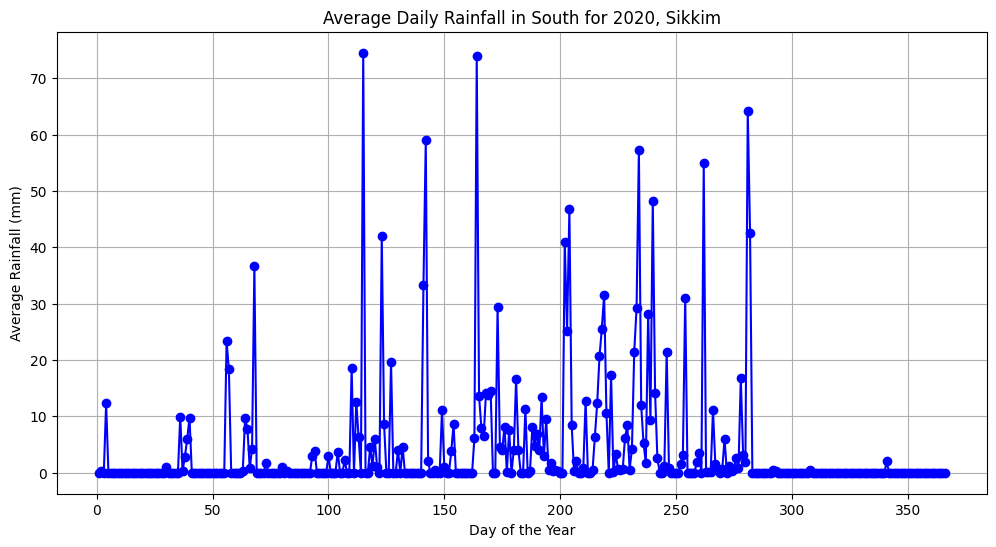

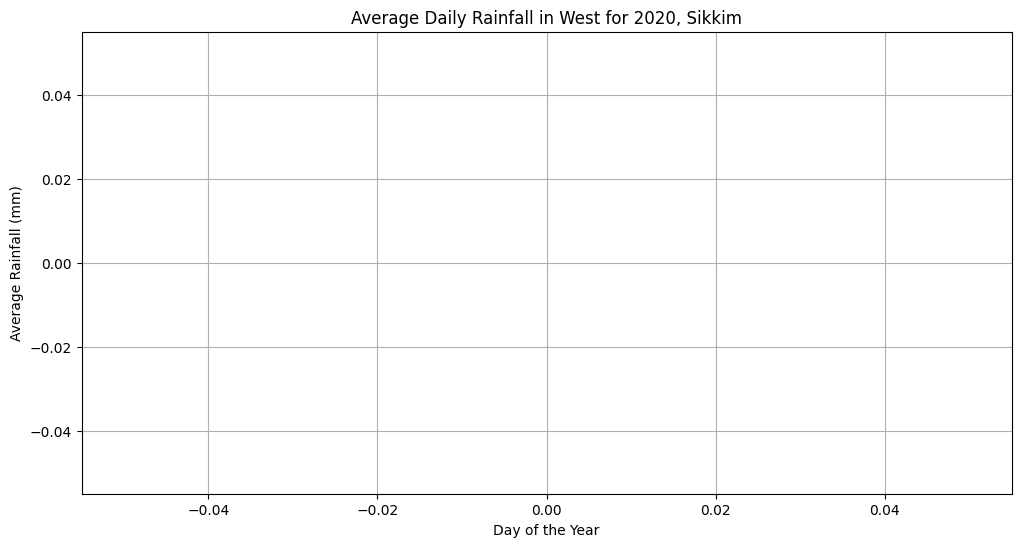

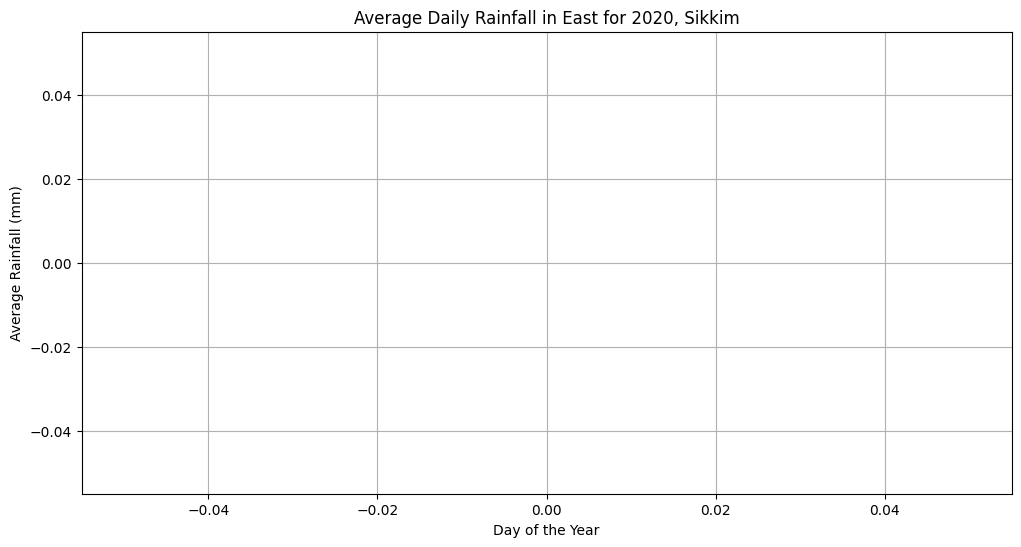

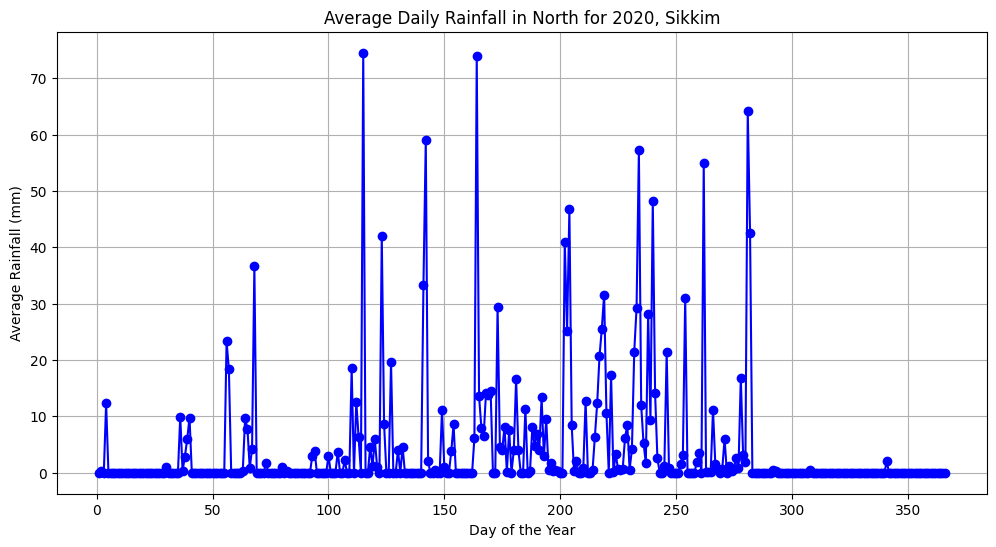

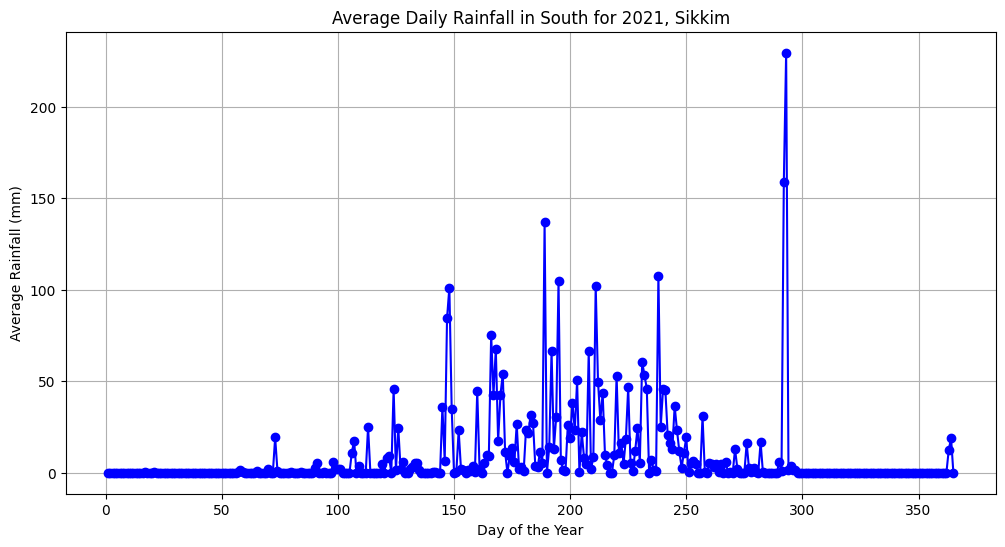

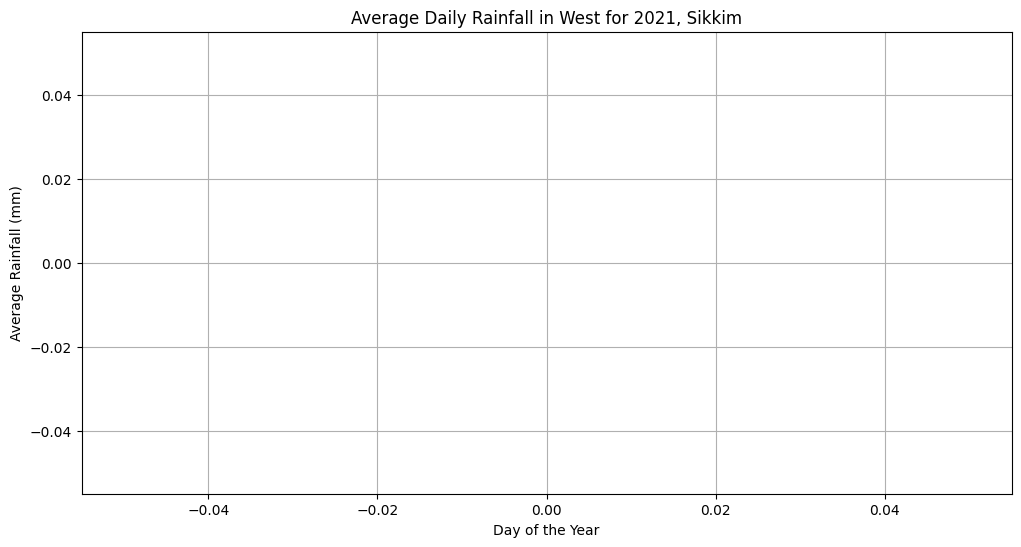

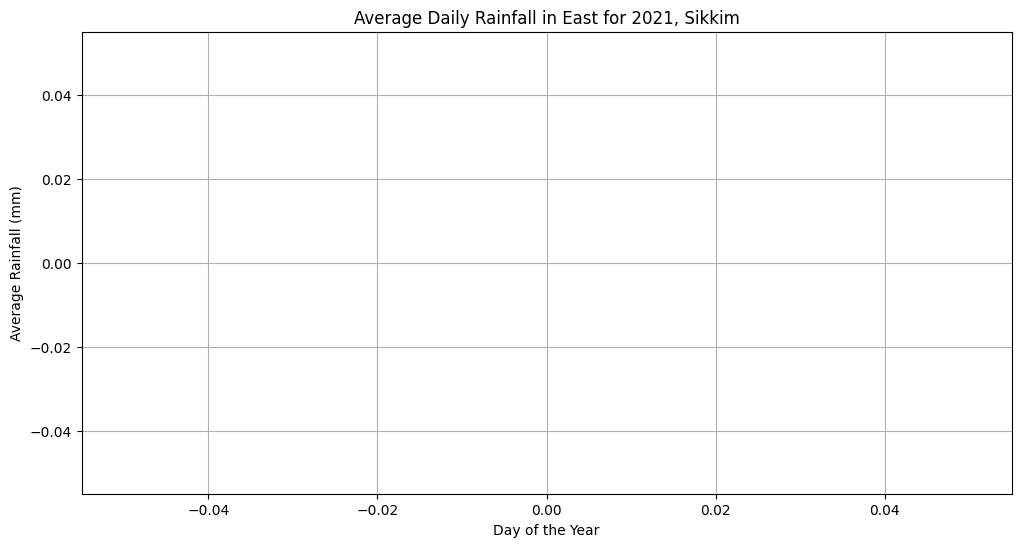

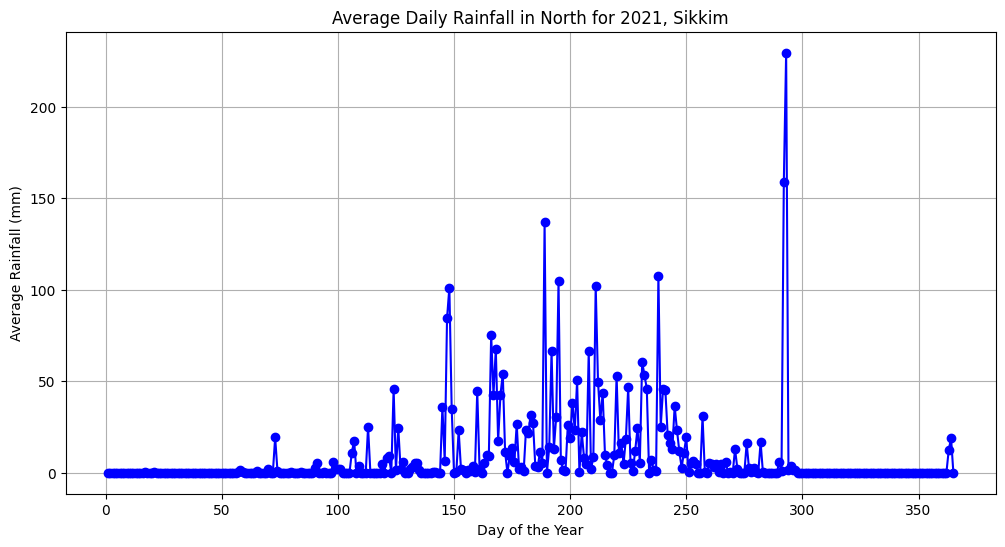

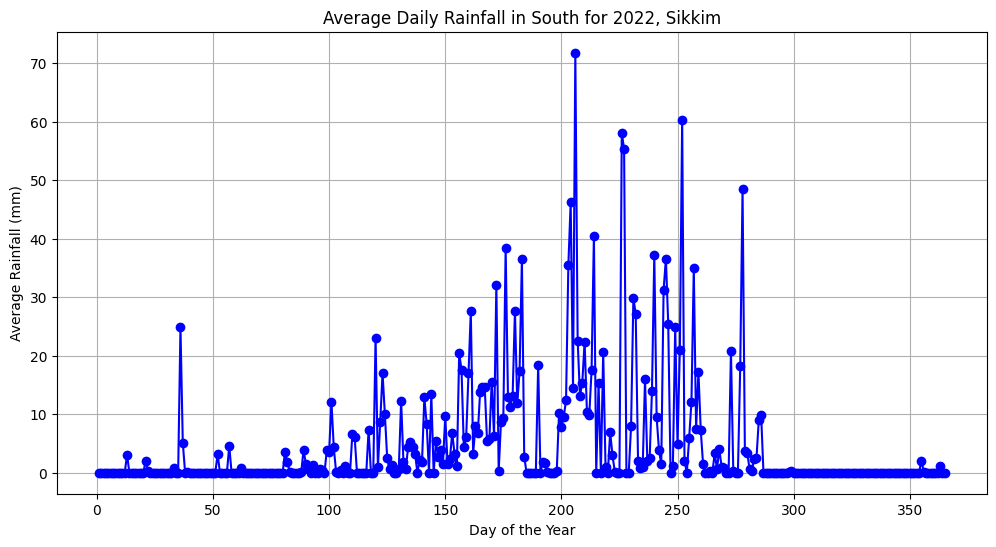

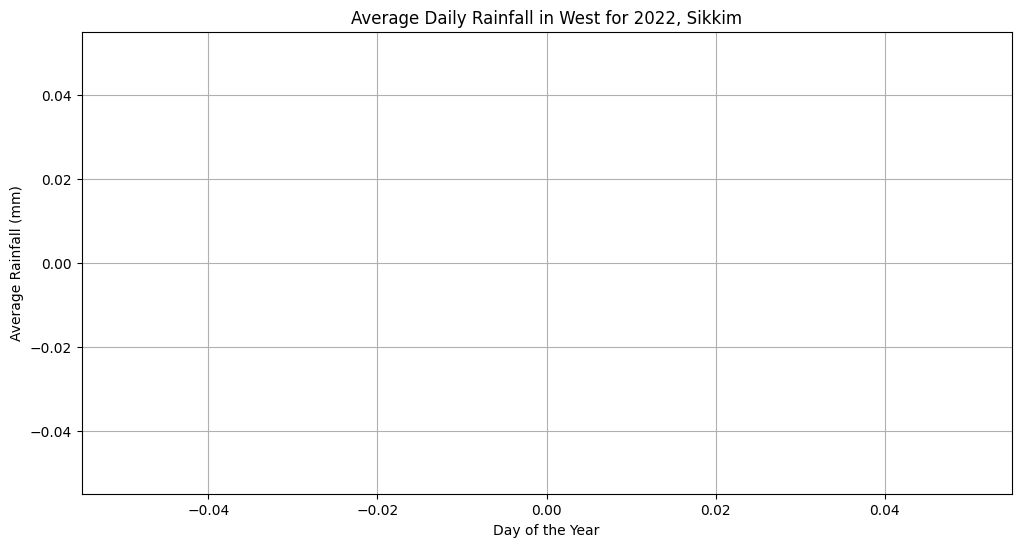

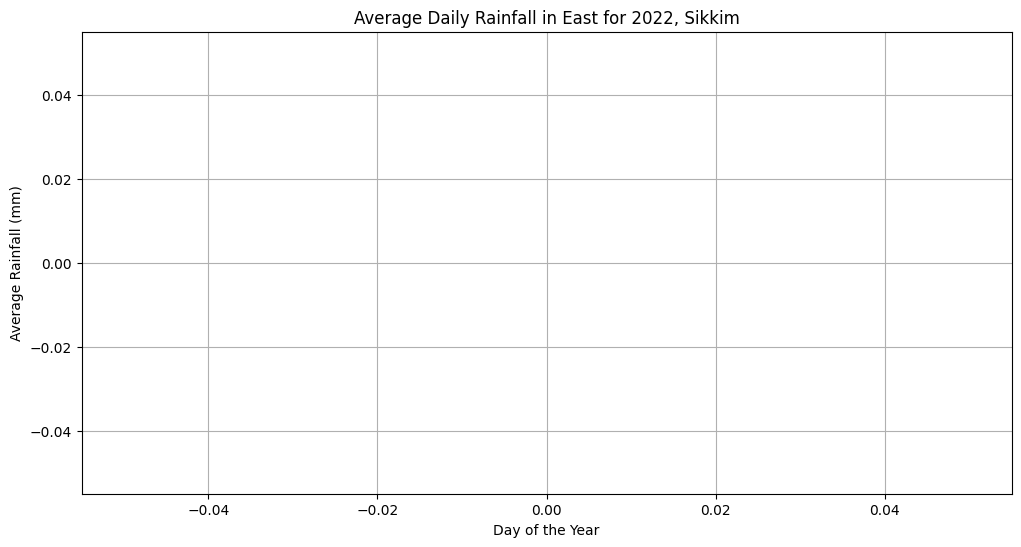

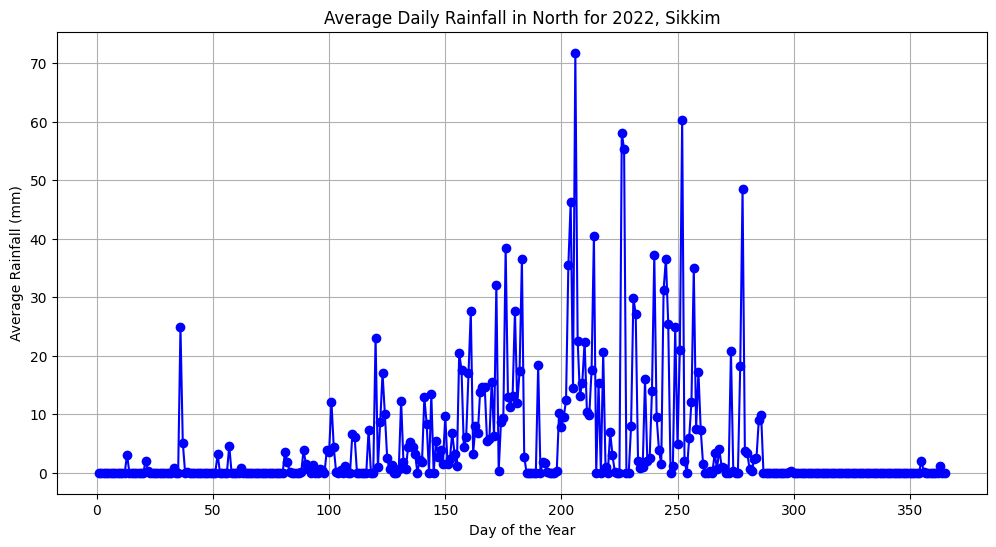

In [ ]:
import geopandas as gpd
import pyproj
from shapely.geometry import Point



for year in range(2018, 2023):


    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    # Loop through each district and extract data
    for district_name, district_geometry in zip(sikkim_shapefile['district'], sikkim_shapefile['geometry']):
        # Extract the bounding box for the district
        min_lon, min_lat, max_lon, max_lat = district_geometry.bounds

        # Find latitude and longitude indices within the district's boundaries
        latitude_indices = np.where((rainfall_data['LATITUDE'] >= min_lat) & (rainfall_data['LATITUDE'] <= max_lat))[0]
        longitude_indices = np.where((rainfall_data['LONGITUDE'] >= min_lon) & (rainfall_data['LONGITUDE'] <= max_lon))[0]

        # Slice the rainfall data for the current district
        district_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]

        # Calculate the average rainfall for each day over the entire time range

        average_rainfall_per_day = np.mean(district_rainfall_data, axis=(1, 2))

        # Plot the average rainfall for each day using a line plot
        plt.figure(figsize=(12, 6))
        plt.plot(np.arange(1, len(average_rainfall_per_day) + 1), average_rainfall_per_day, marker='o', linestyle='-', color='b')
        plt.xlabel('Day of the Year')
        plt.ylabel('Average Rainfall (mm)')
        plt.title(f'Average Daily Rainfall in {district_name} for {year}, Sikkim')
        plt.grid(True)
        plt.show()

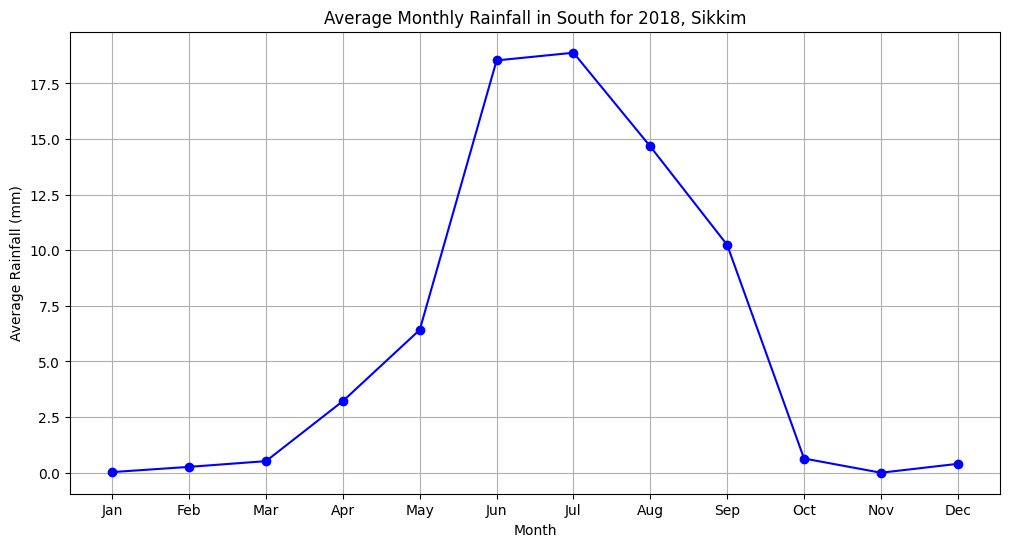

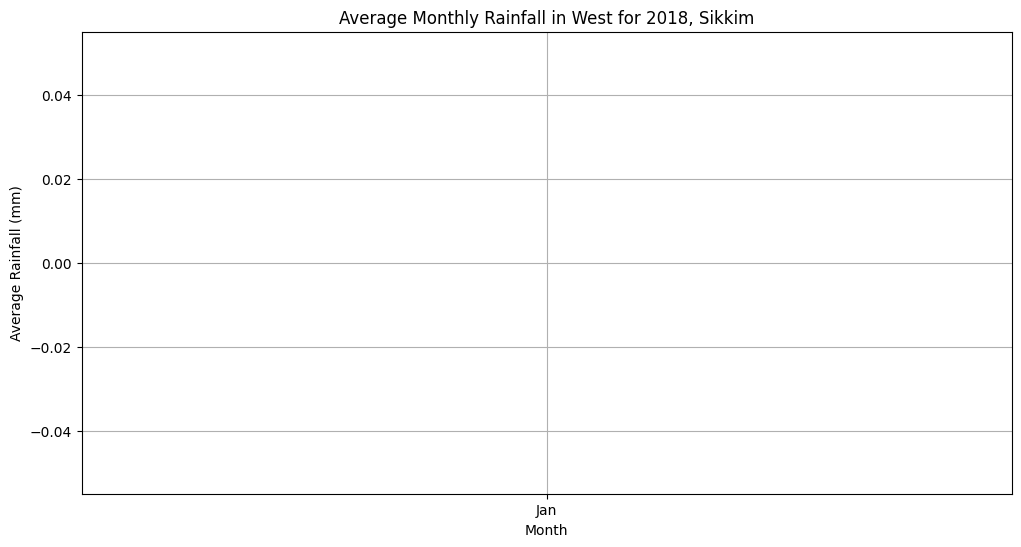

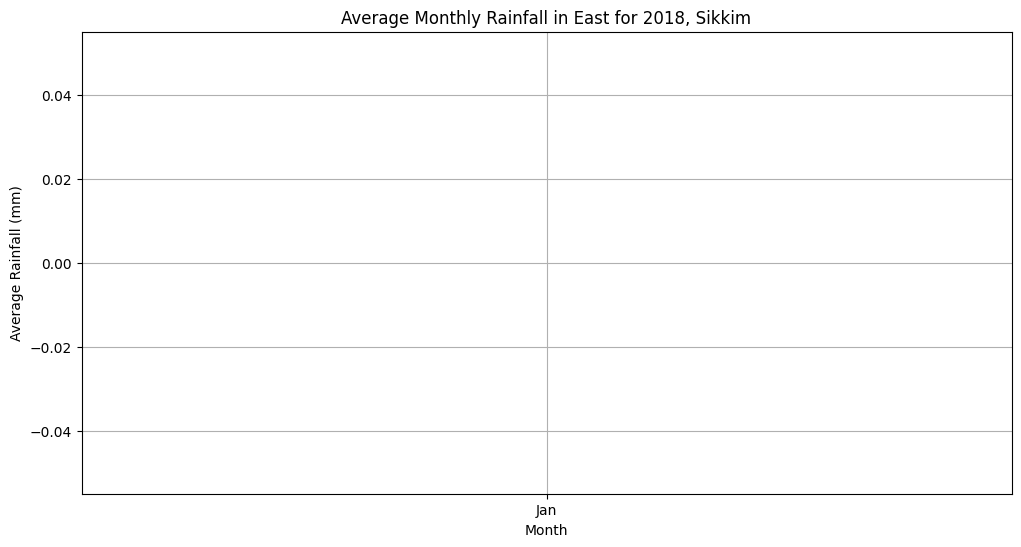

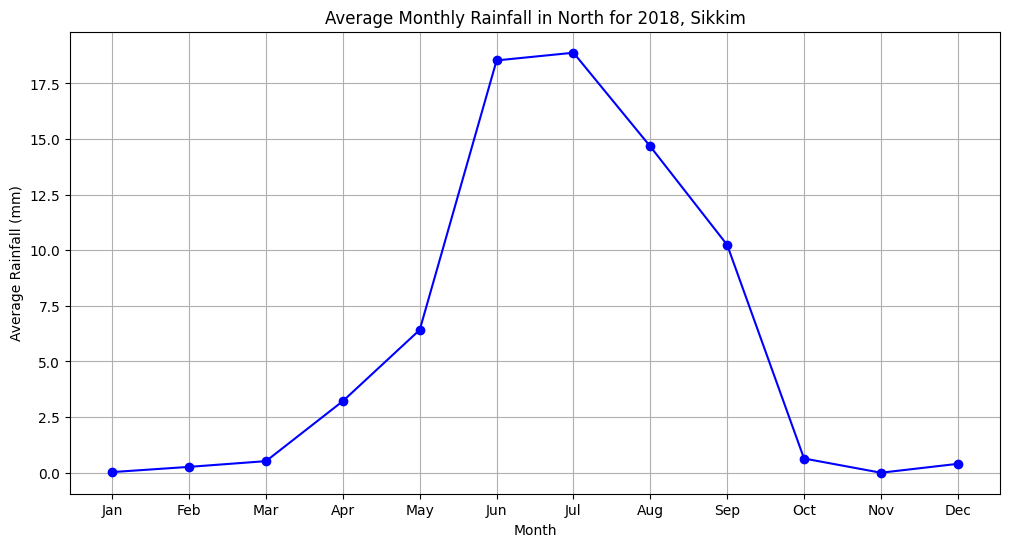

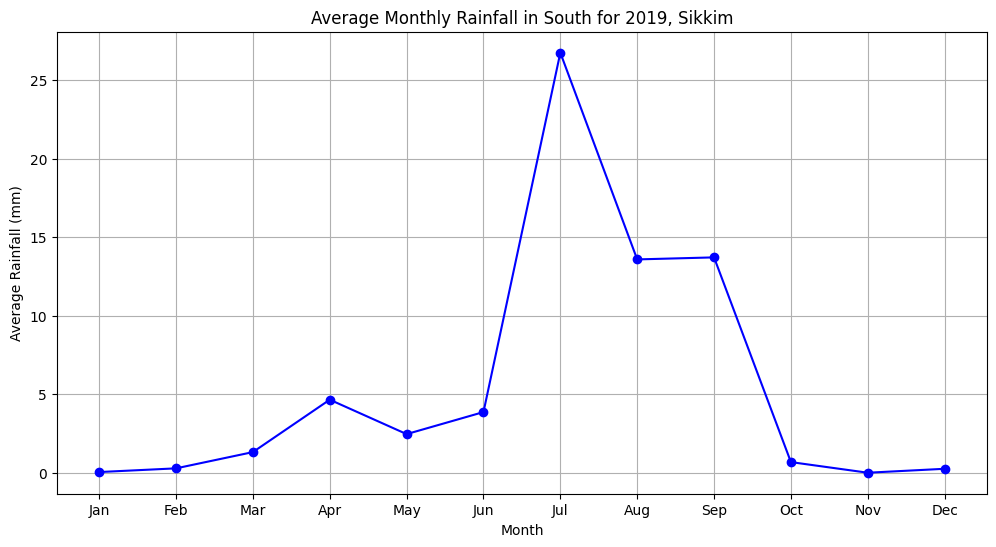

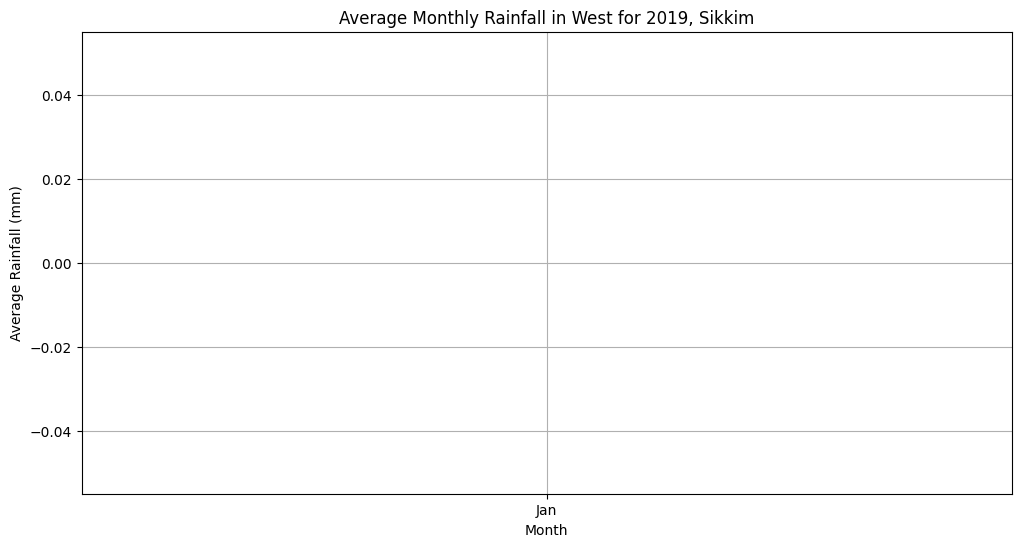

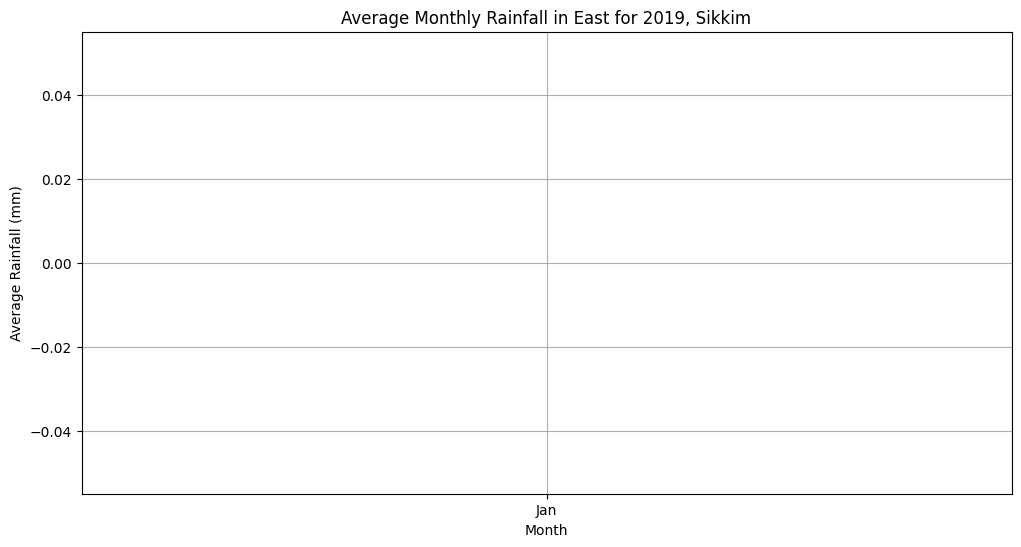

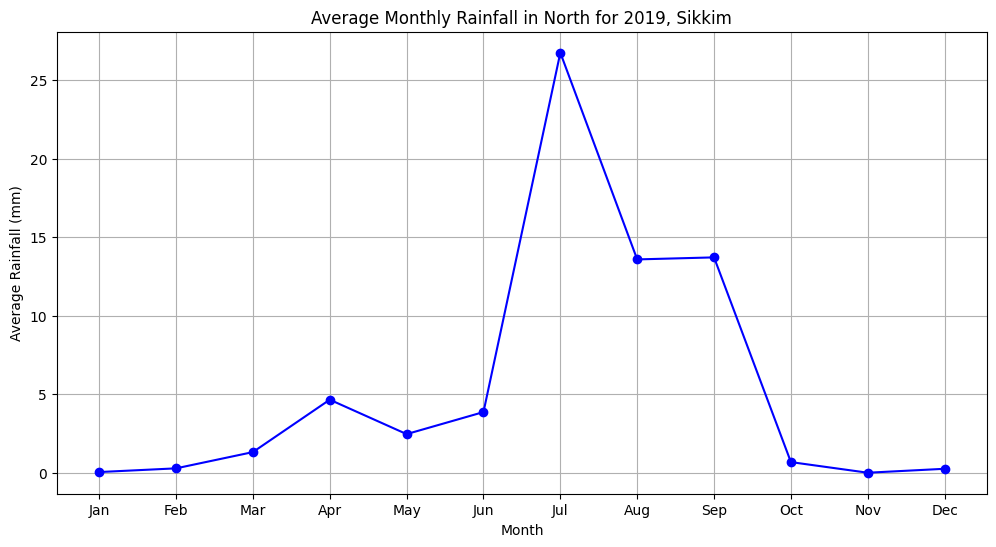

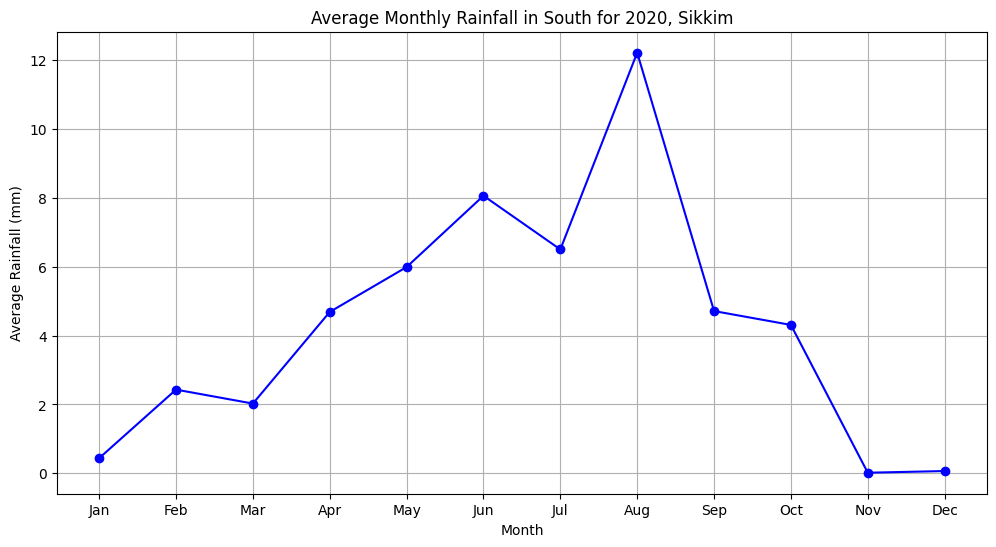

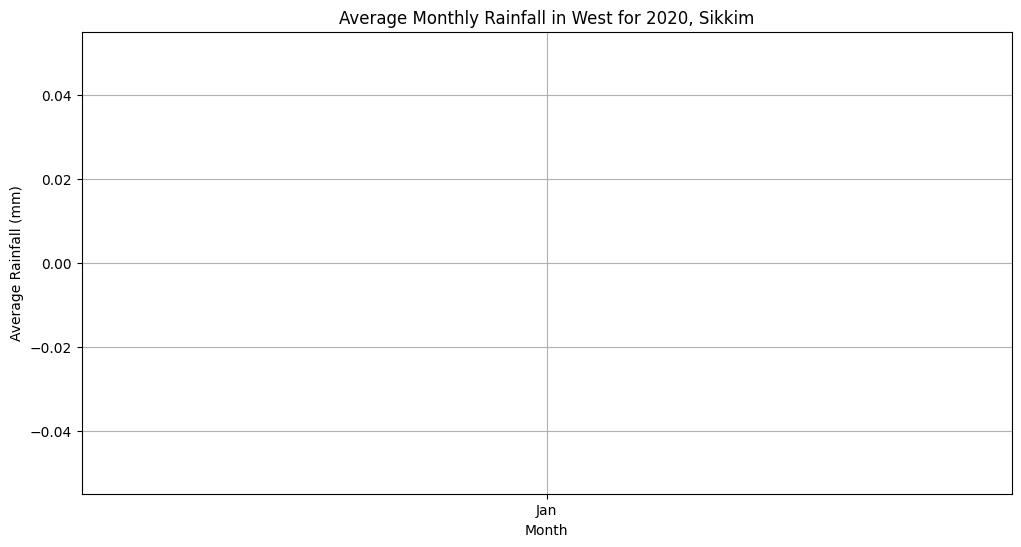

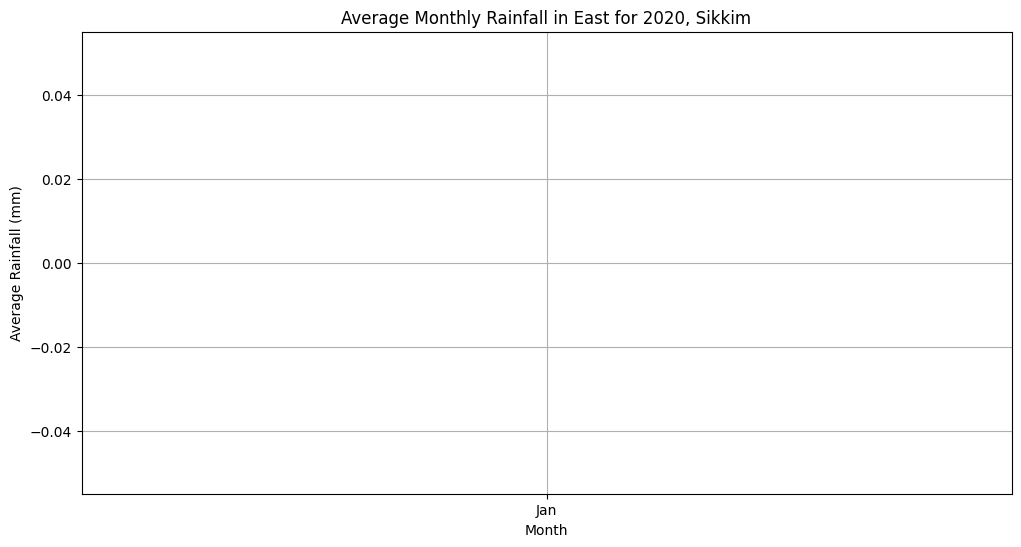

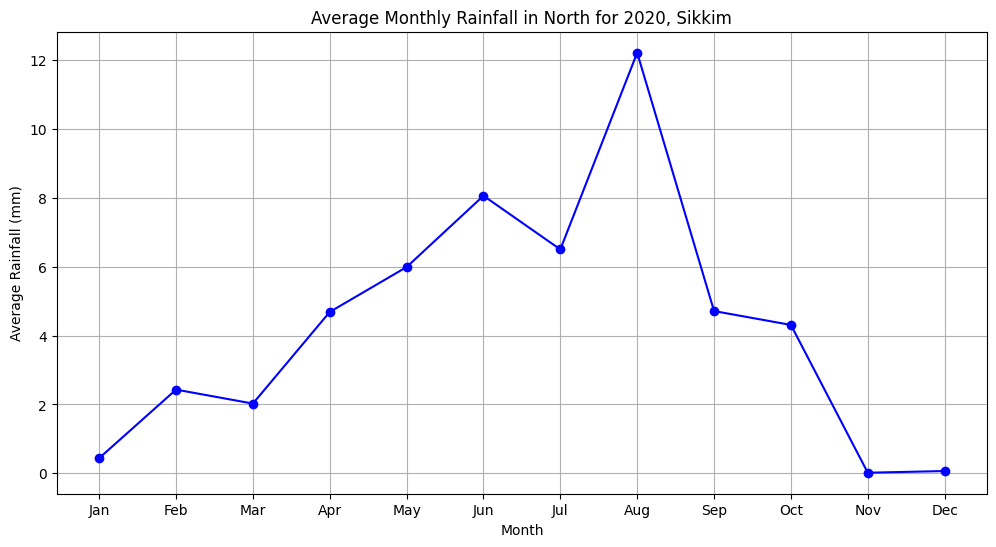

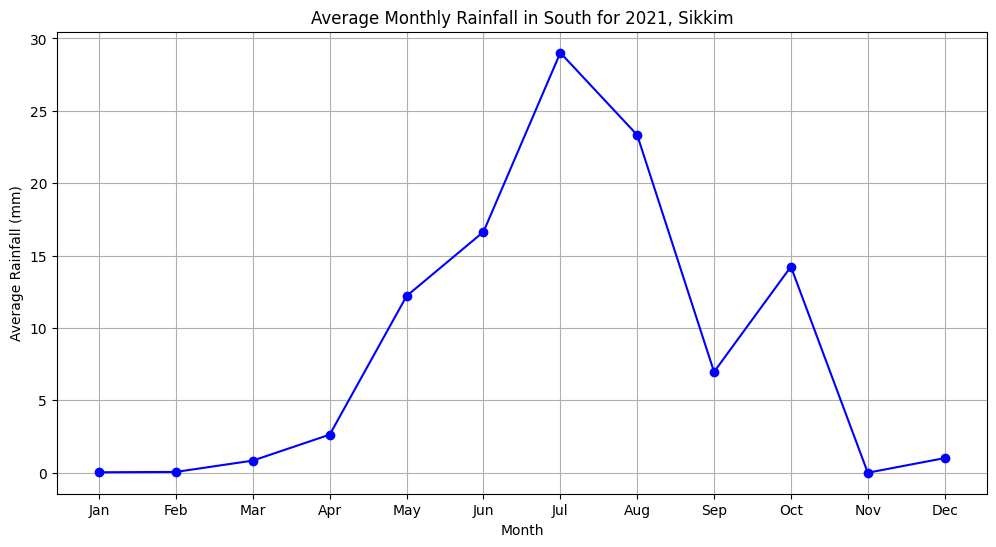

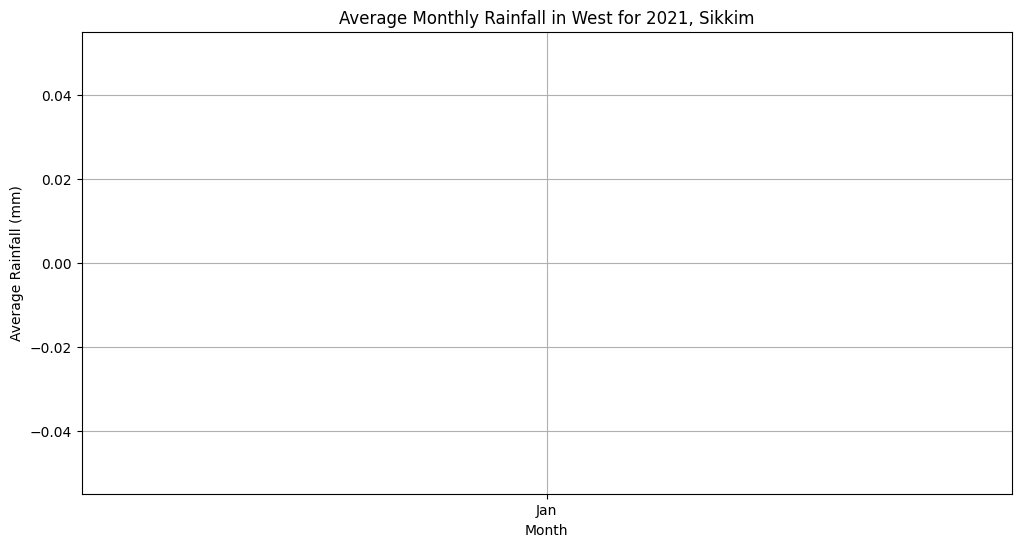

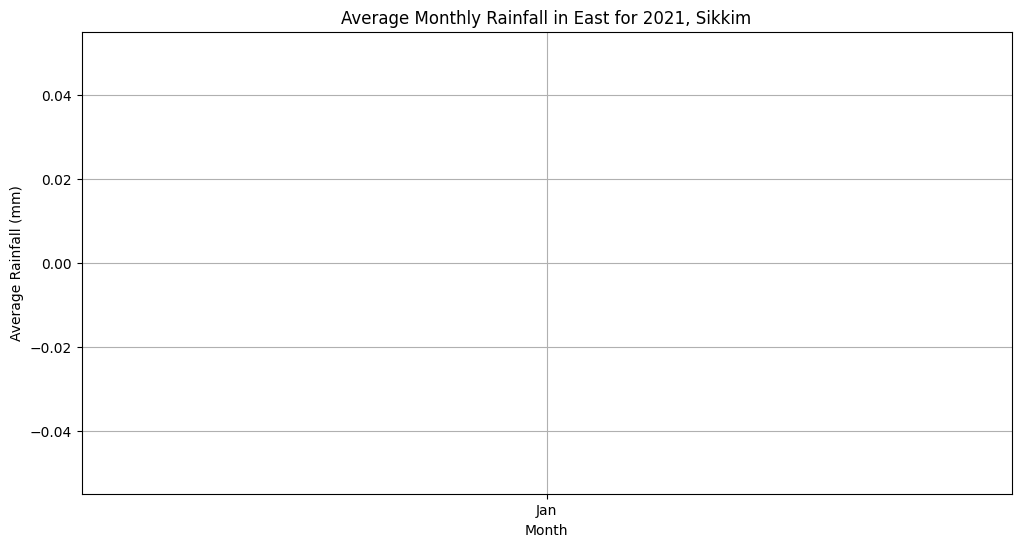

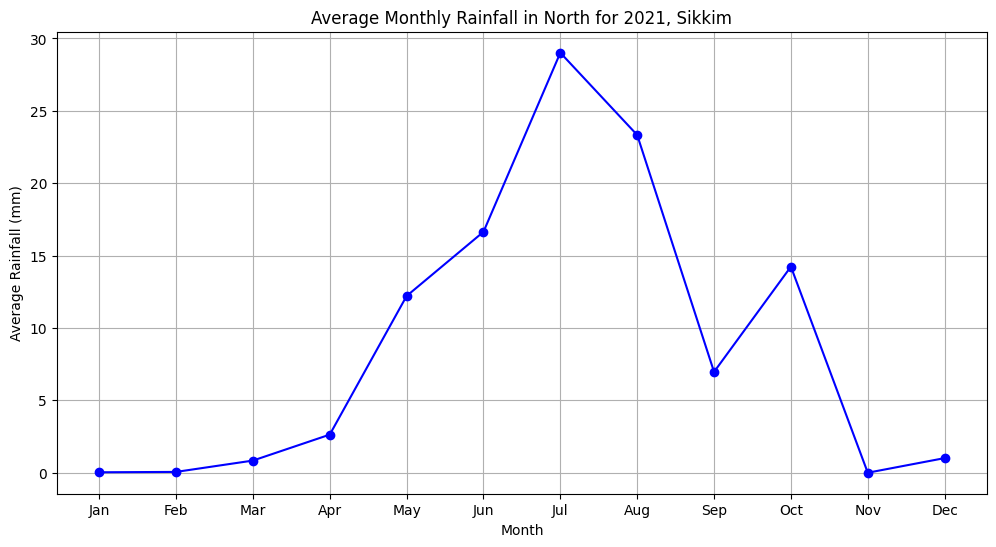

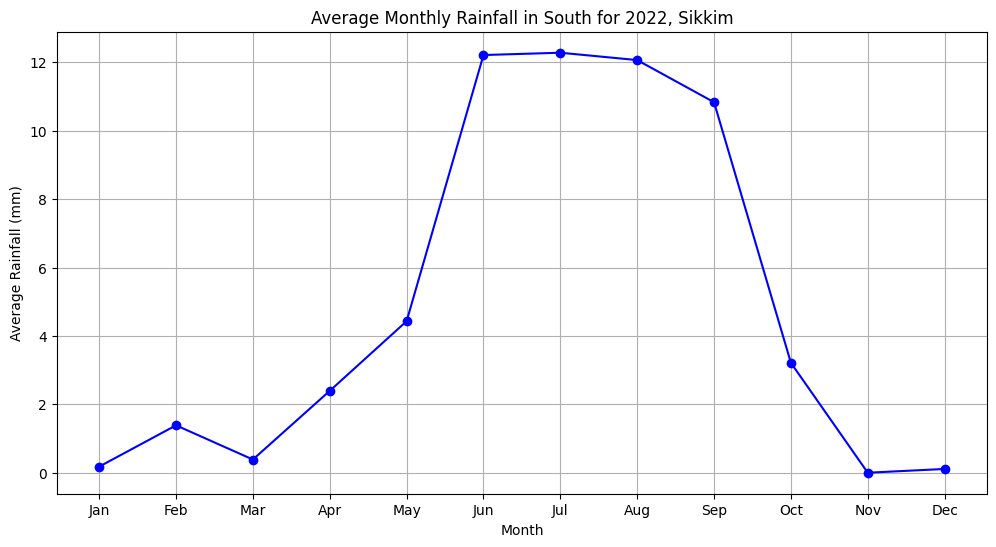

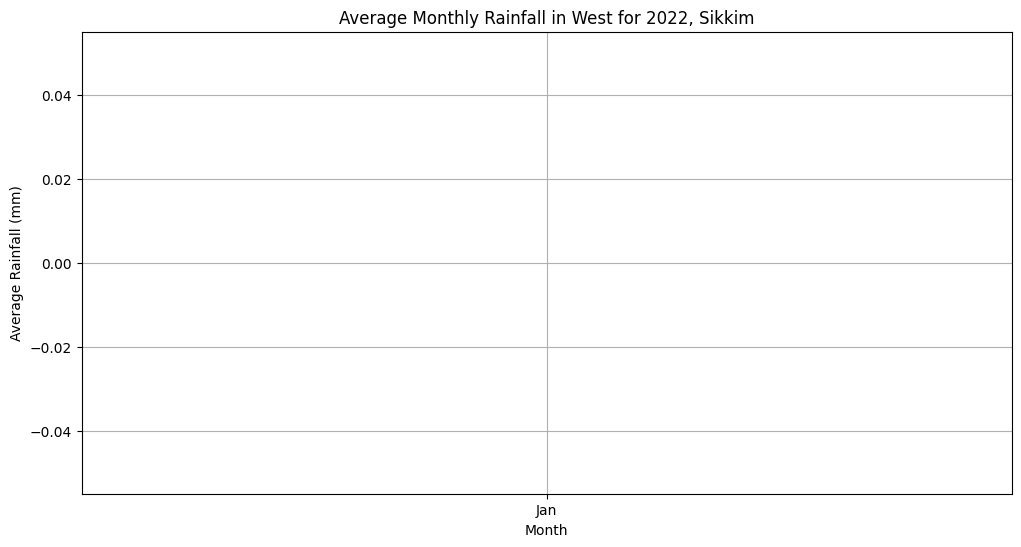

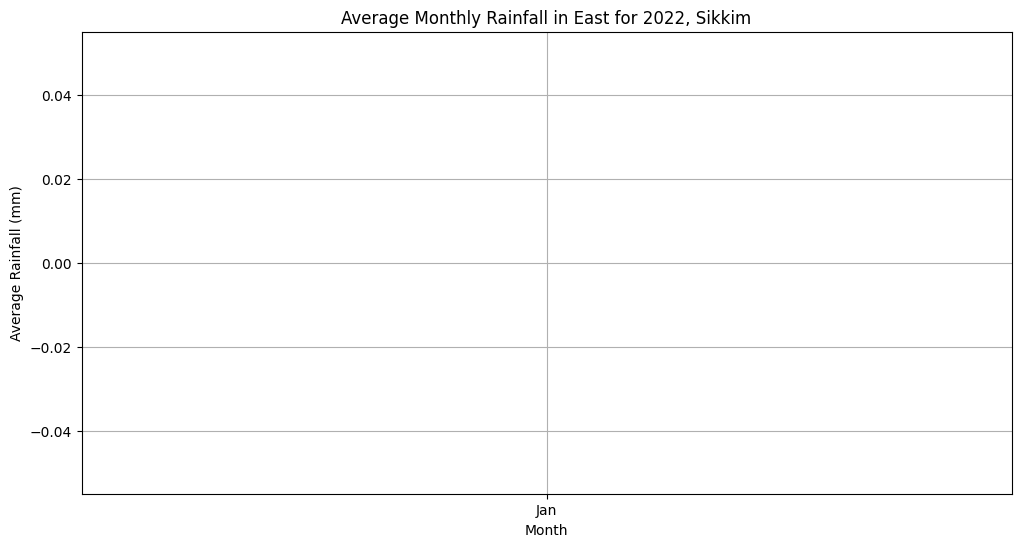

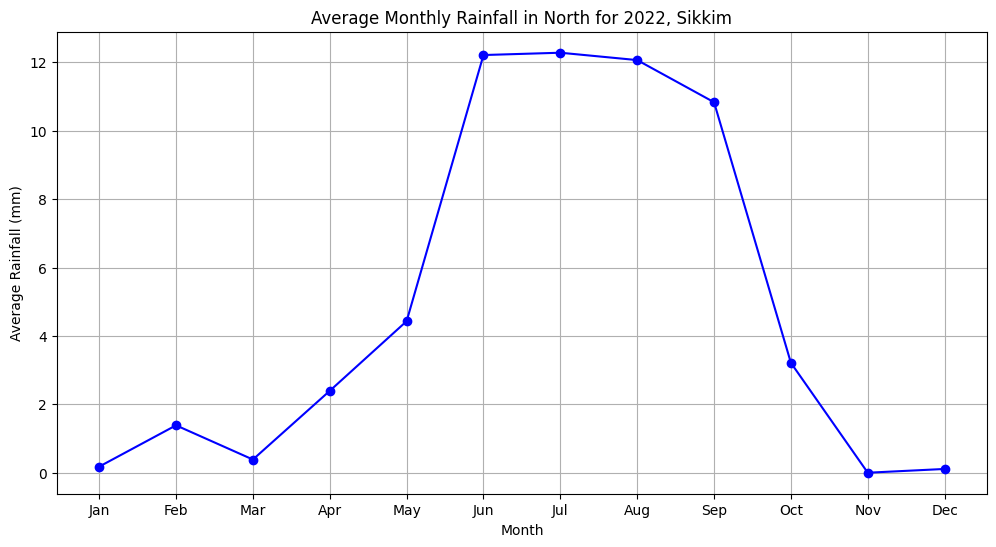

In [ ]:
import geopandas as gpd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


# Loop through each year
for year in range(2018, 2023):
    # Load the rainfall data for the current year
    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Loop through each district and extract data
    for district_name, district_geometry in zip(sikkim_shapefile['district'], sikkim_shapefile['geometry']):
        # Extract the bounding box for the district
        min_lon, min_lat, max_lon, max_lat = district_geometry.bounds

        # Find latitude and longitude indices within the district's boundaries
        latitude_indices = np.where((rainfall_data['LATITUDE'] >= min_lat) & (rainfall_data['LATITUDE'] <= max_lat))[0]
        longitude_indices = np.where((rainfall_data['LONGITUDE'] >= min_lon) & (rainfall_data['LONGITUDE'] <= max_lon))[0]

        # Slice the rainfall data for the current district
        district_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]

        # Resample the data to monthly averages
        monthly_average_rainfall = district_rainfall_data.resample(TIME='1M').mean()

        y_data = monthly_average_rainfall.values.squeeze()

        # Plot the average monthly rainfall using a line plot
        plt.figure(figsize=(12, 6))
        plt.plot(months, y_data, marker='o', linestyle='-', color='b')
        plt.xlabel('Month')
        plt.ylabel('Average Rainfall (mm)')
        plt.title(f'Average Monthly Rainfall in {district_name} for {year}, Sikkim')
        plt.grid(True)
        plt.show()
